In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key 
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | lynn haven
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mandalgovi
Processing Record 6 of Set 1 | paris
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | san carlos
Processing Record 12 of Set 1 | aksarka
Processing Record 13 of Set 1 | brandfort
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | dibaya
City not found. Skipping...
Processing Record 18 of Set 1 | canberra
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | san severo
Processing Record 22 of Set 1 

City not found. Skipping...
Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | machali
Processing Record 38 of Set 4 | agvali
Processing Record 39 of Set 4 | lolua
City not found. Skipping...
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | beroroha
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | foix
Processing Record 45 of Set 4 | east london
Processing Record 46 of Set 4 | airai
Processing Record 47 of Set 4 | zumpahuacan
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | port elizabeth
Processing Record 0 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 1 of Set 5 | kosa
Processing Record 2 of Set 5 | aginskoye
Processing Record 3 of Set 5 | puerto ayora
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | bosaso
Processing Record 7 of Set 5 | porto novo
Processing Record 8 of Se

City not found. Skipping...
Processing Record 30 of Set 8 | bairiki
Processing Record 31 of Set 8 | saleaula
City not found. Skipping...
Processing Record 32 of Set 8 | tottori
Processing Record 33 of Set 8 | weligama
Processing Record 34 of Set 8 | oum hadjer
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | angra dos reis
Processing Record 37 of Set 8 | raga
Processing Record 38 of Set 8 | santiago
Processing Record 39 of Set 8 | kimberley
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | amga
Processing Record 42 of Set 8 | berlevag
Processing Record 43 of Set 8 | myanaung
Processing Record 44 of Set 8 | sovetskiy
Processing Record 45 of Set 8 | hobyo
Processing Record 46 of Set 8 | isiro
Processing Record 47 of Set 8 | north branford
Processing Record 48 of Set 8 | abu dhabi
Processing Record 49 of Set 8 | alofi
Processing Record 0 of Set 9 | venice
Processing Record 1 of Set 9 | bundaberg
Processing Record 2 of Set 9 | port-cartier
Processing

Processing Record 19 of Set 12 | mumford
Processing Record 20 of Set 12 | brae
Processing Record 21 of Set 12 | alta floresta
Processing Record 22 of Set 12 | camapua
Processing Record 23 of Set 12 | pochutla
Processing Record 24 of Set 12 | biu
Processing Record 25 of Set 12 | borogontsy
Processing Record 26 of Set 12 | doha
Processing Record 27 of Set 12 | kegayli
City not found. Skipping...
Processing Record 28 of Set 12 | opole lubelskie
Processing Record 29 of Set 12 | russell
Processing Record 30 of Set 12 | hun
Processing Record 31 of Set 12 | guaira
Processing Record 32 of Set 12 | urumqi
Processing Record 33 of Set 12 | morondava
Processing Record 34 of Set 12 | itupiranga
Processing Record 35 of Set 12 | dhidhdhoo
Processing Record 36 of Set 12 | long beach
Processing Record 37 of Set 12 | shnogh
Processing Record 38 of Set 12 | nongstoin
Processing Record 39 of Set 12 | hailey
Processing Record 40 of Set 12 | katherine
Processing Record 41 of Set 12 | kailua
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,11.56,72,94,2.71,ZA,1681342527
1,punta arenas,-53.1500,-70.9167,4.06,70,0,2.06,CL,1681342527
2,lynn haven,30.2455,-85.6483,23.06,49,75,4.63,US,1681342271
3,albany,42.6001,-73.9662,23.23,48,2,2.46,US,1681342508
4,mandalgovi,45.7625,106.2708,4.29,32,91,3.58,MN,1681342528


In [6]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,11.56,72,94,2.71,ZA,1681342527
1,punta arenas,-53.1500,-70.9167,4.06,70,0,2.06,CL,1681342527
2,lynn haven,30.2455,-85.6483,23.06,49,75,4.63,US,1681342271
3,albany,42.6001,-73.9662,23.23,48,2,2.46,US,1681342508
4,mandalgovi,45.7625,106.2708,4.29,32,91,3.58,MN,1681342528


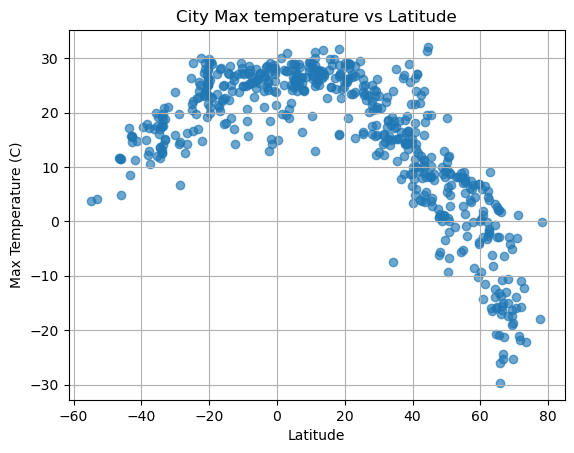

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], alpha = .65)
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max temperature vs Latitude")
plt.grid()
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

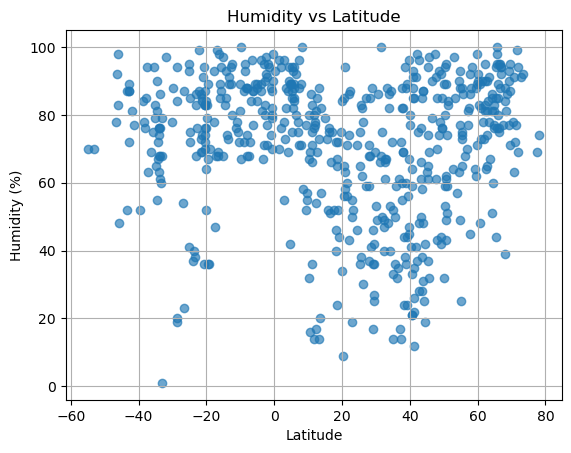

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], alpha = .65)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

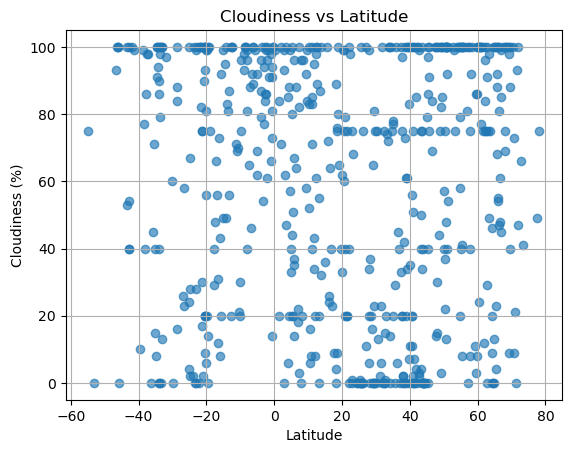

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], alpha = .65)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

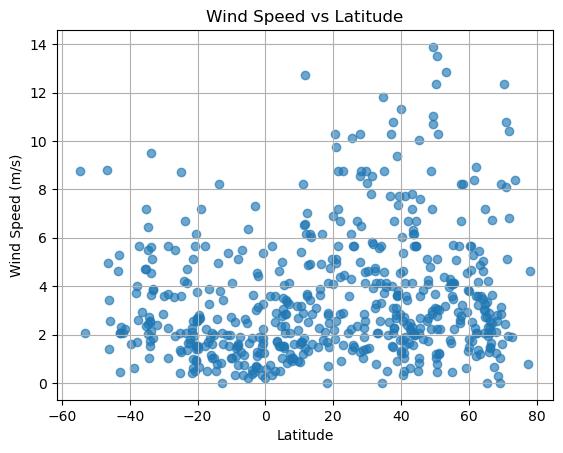

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], alpha = .65)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [12]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#regress_values = x_values * slope + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lynn haven,30.2455,-85.6483,23.06,49,75,4.63,US,1681342271
3,albany,42.6001,-73.9662,23.23,48,2,2.46,US,1681342508
4,mandalgovi,45.7625,106.2708,4.29,32,91,3.58,MN,1681342528
5,paris,48.8534,2.3488,8.76,78,75,8.75,FR,1681341958
6,ilulissat,69.2167,-51.1000,-4.99,93,100,1.03,GL,1681342530


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,11.56,72,94,2.71,ZA,1681342527
1,punta arenas,-53.1500,-70.9167,4.06,70,0,2.06,CL,1681342527
8,port alfred,-33.5906,26.8910,18.62,61,100,3.64,ZA,1681342531
9,rikitea,-23.1203,-134.9692,25.56,68,28,4.73,PF,1681342531
12,brandfort,-28.7001,26.4597,6.67,20,88,2.25,ZA,1681342533


The r-value is: 0.7459444856331299


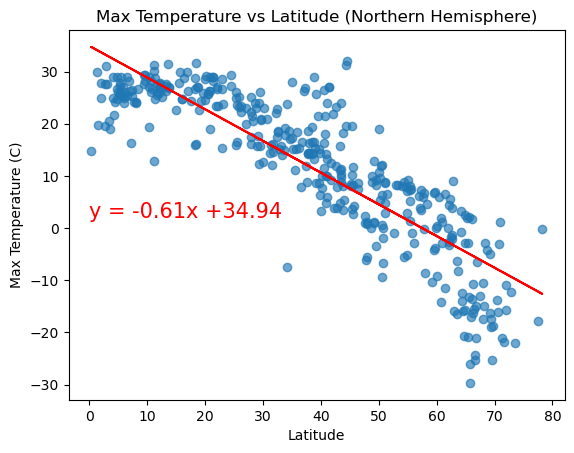

In [15]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")


In [16]:
# This model shows us the general relationship between  cities in the northern hemisphere,
# which are denoted by latitude, in relation to cities maximum temparature. 
# We see a general downward trend for this relationship, also shown by the negative slope.
#This suggests as our latitude increases and we get further away from a latitude of 0, the max temperature decreases.
#This would make sense as the areas closer to the center of the world, so cities closer to a latitude of 0,
# are closer to the equator which is generally known to be warmer. As you go further up north , it gets colder.
# the r value being so large shows there is a strong correlation between the two.


The r-value is: 0.49324928045963884


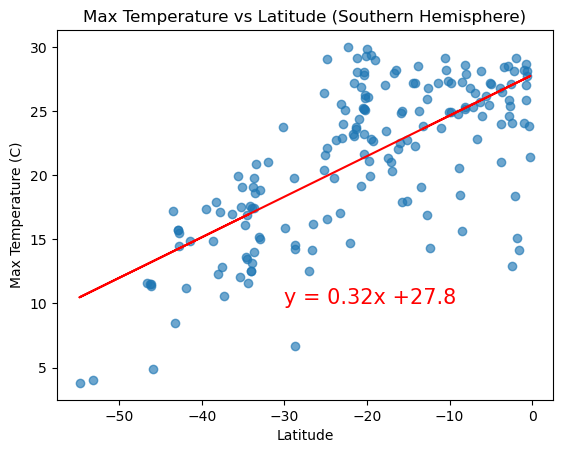

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Max Temperature vs Latitude (Southern Hemisphere)")
print(f"The r-value is: {rvalue**2}")

In [18]:
# This model shows us the general relationship between  cities in the southern hemisphere,
# which are denoted by latitude, in relation to cities maximum temparature. 
# We see a general upward trend for this relationship, also shown by the positive slope.
#This suggests as our latitude increases and we approch a latitude of 0, the max temperature increases
#This would make sense as the areas closer to the center of the world, so cities closer to a latitude of 0,
# are closer to the equator which is generally known to be warmer. As you go get further away from the south
# pole, it gets warmer and warmer.
# the r value is not quite that large but large enough to definitely suugest a strong correlation between the two.



The r-value is: 0.023806520849433507


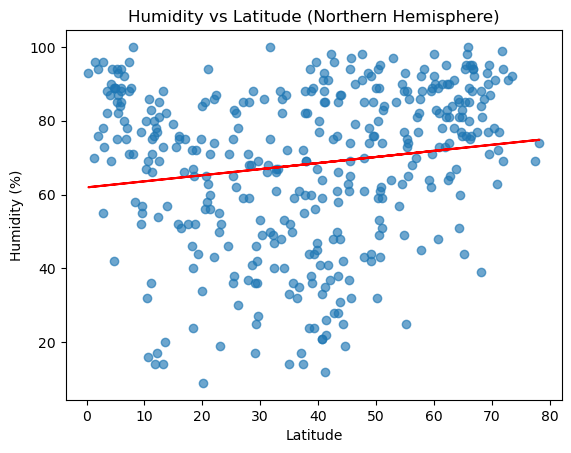

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,2),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

In [20]:
#This model demoonstrates the relationship between humidity percentage vs latitude in northern hemisphere.
#We can see a positive slope given by lin. equation  between latitude
# and humidity percentage where as the latitude in increases,
#in general, the humidity percentage also increases. However, this is not as quite appartent as there are several
# recording of data which don't fit this statement. So this must suggest a lack of correlation or little correlation.
# Addtionally, The r value being so small tells up there is only little correlation.

The r-value is: 0.06245361771501081


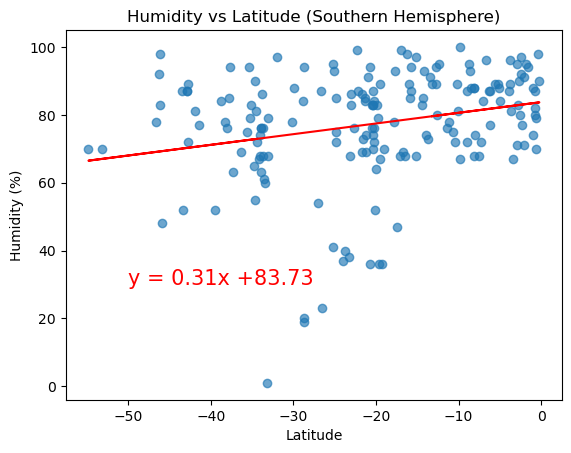

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

In [22]:
#This model demoonstrates the relationship between humidity percentage vs latitude in southern hemisphere.
#We can see a positive slope between latitude and humidity percentage where as the latitude in increases,
#in general, the humidity percentage also increases. However, this is not as quite appartent as there are several
# recording of data which don't fit this. The r value being so small 
# and close to 0 tells up there is little to no correlation.
#

The r-value is: 0.01778872025755761


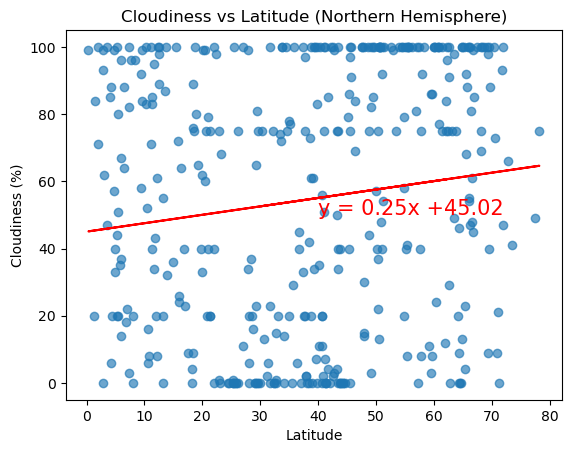

In [23]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

In [24]:
#This model demoonstrates the relationship between cloudiness percentage vs latitude in northern hemisphere.
#We can see a small positive slope between latitude and cloudiness percentage where as the latitude in increases,
#in general, the Cloudiness percentage also increases. However, this is not as quite appartent as there are several
# recording of data which don't fit this. The r value being so small tells up there is almost no correlation.
#

The r-value is: 0.03369082368628855


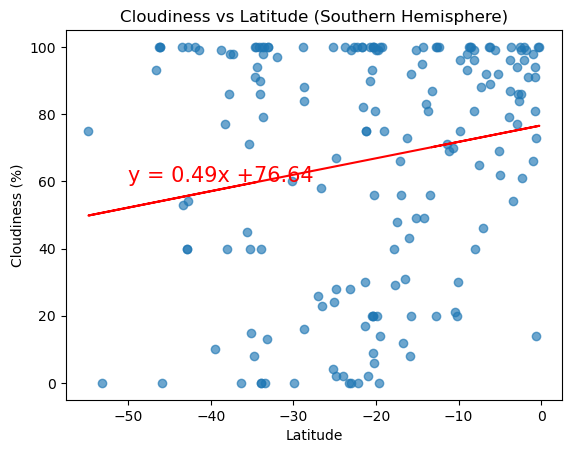

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs Latitude (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

In [26]:
#This model demoonstrates the relationship between cloudiness percentage vs latitude in southern hemisphere.
#We can see a  positive slope between latitude and cloudiness percentage where as the latitude in increases,
#in general, the Cloudiness percentage also increases. However, this is not as quite appartent as there are several
# recording of data which don't fit this. The r value being really small tells up there is little to almost no correlation.
#

The r-value is: 0.0070914863008446375


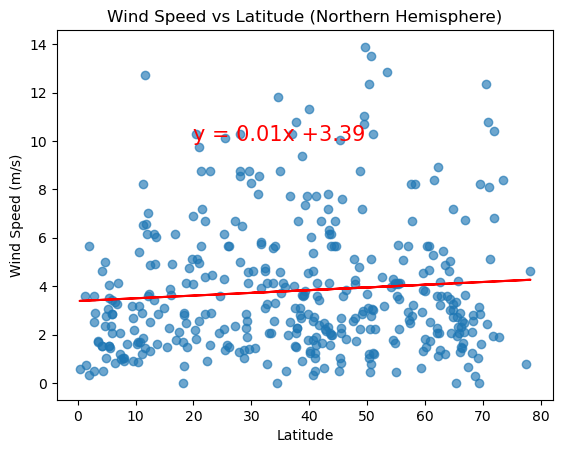

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude (Northern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

In [28]:
#This model demoonstrates the relationship between wind speed vs latitude in northern hemisphere.
#We can see a slope  of almost 0 is between latitude and wind speed. There is no consistency to the data.
#The r value being so close to 0 tells us there is no correlation.
#

The r-value is: 0.08322899996996098


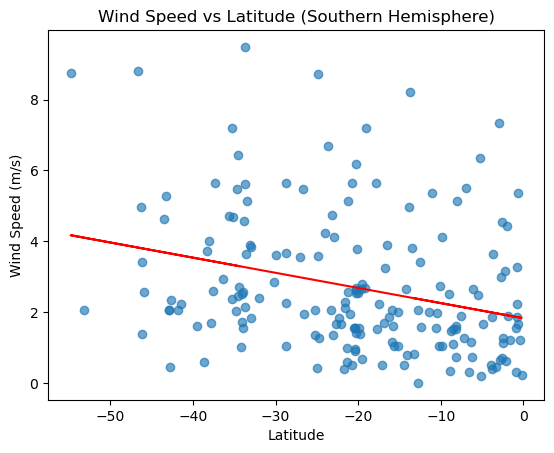

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values,alpha = .65)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed vs Latitude (Southern Hemisphere)")

print(f"The r-value is: {rvalue**2}")

In [30]:
#This model demoonstrates the relationship between wind speed vs latitude in northern hemisphere.
#We can see a very very small negative slope which is close to 0 between latitude and wind speed. 
#There is a little to no consistency to the data.
#The r value being so small tells us there is little to no correlation.
#